### Imports

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the beta-VAE module
import bvae_model as bvae
import spectrum_preprocessing as sp

### Load raw spectra

In [28]:
#your path

path = "C:/Users/Zach/Documents/GitHub/betaVAE_Training/training_data/SMP65#010 100d 820um.csv"


In [29]:
filename = path.split("/")[-1]
filename

'SMP65#010 100d 820um.csv'

In [30]:
df = pd.read_csv(path, skiprows=[1,2])  # Skip metadata rows if present

if df.isnull().values.any():
    df = df.fillna(method='ffill').fillna(method='bfill')

print(f"Dataframe shape: {df.shape}")

Dataframe shape: (6144, 2100)


In [31]:
df

,map_x,map_y,Sample Name,1981.7 - 2095.8,3997.9328286151754,3996.348861567388,3994.7648945196006,3993.1809274718134,3991.5969604240263,3990.0129933762387,...,693.7775669308426,692.1935998830554,690.6096328352678,689.0256657874806,687.4416987396935,685.8577316919059,684.2737646441187,682.6897975963311,681.105830548544,679.5218635007568
0,40988.1,23137.0,820um 100d,3.56471,0.233556,0.228251,0.227605,0.231628,0.236719,0.240258,...,0.411252,0.303761,0.268916,0.253041,0.224014,0.207551,0.207332,0.217683,0.229163,0.215141
1,40993.5,23137.0,820um 100d,3.70316,0.245132,0.245642,0.244359,0.243178,0.243841,0.245695,...,0.389317,0.525837,0.672218,0.854999,1.189700,0.713360,0.463939,0.326325,0.239639,0.192857
2,40999.0,23137.0,820um 100d,3.66241,0.240147,0.240315,0.240425,0.241407,0.243460,0.245639,...,0.364210,0.334643,0.395818,0.516835,0.619468,0.592182,0.437696,0.352370,0.306552,0.229658
3,41004.4,23137.0,820um 100d,3.64779,0.251542,0.250693,0.249778,0.250292,0.251914,0.253840,...,0.293983,0.248948,0.242738,0.288417,0.256909,0.136450,0.072859,0.021276,0.007984,-0.026282
4,41009.8,23137.0,820um 100d,3.65807,0.293280,0.292357,0.292658,0.293088,0.292229,0.291416,...,0.188199,0.193940,0.212957,0.263282,0.322140,0.314457,0.264214,0.227882,0.212649,0.217863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,41308.7,23652.1,820um 100d,3.55713,0.266366,0.267131,0.266541,0.265386,0.264996,0.266676,...,0.295873,0.263304,0.247085,0.269290,0.356271,0.425540,0.383230,0.325846,0.297123,0.306896
6140,41314.1,23652.1,820um 100d,3.56724,0.262756,0.262505,0.262341,0.261683,0.260839,0.260871,...,0.695794,0.662049,0.539168,0.406495,0.382023,0.455462,0.469301,0.422460,0.413777,0.428356
6141,41319.5,23652.1,820um 100d,3.88041,0.251792,0.254672,0.258272,0.262655,0.265783,0.266680,...,0.267526,0.249933,0.366247,0.512079,0.535855,0.452727,0.375902,0.360924,0.447071,0.536815
6142,41325.0,23652.1,820um 100d,3.54102,0.241875,0.241851,0.243644,0.245800,0.247153,0.248385,...,0.350836,0.313850,0.323818,0.382262,0.403101,0.412584,0.431928,0.451132,0.464379,0.498972


# Sort the wavenumber columns and data and put in a dataframe
- necessary for input to pipeline below

In [32]:
wavenumber = df.columns.values[4:].astype(float)
wavenumber.sort()
wavenumber = wavenumber.astype(str)
spectra_df = df[wavenumber].copy()
np.dtype(spectra_df.columns.values.astype(float)[0])

dtype('float64')

### Run the pipeline
The `bvae.pipeline()` returns the interpolated wavenumber array; the interpolated absorbance array; the beta-model encodings L1 L2 and L3; the reconstruction MSE; and the reconstructed spectrum.

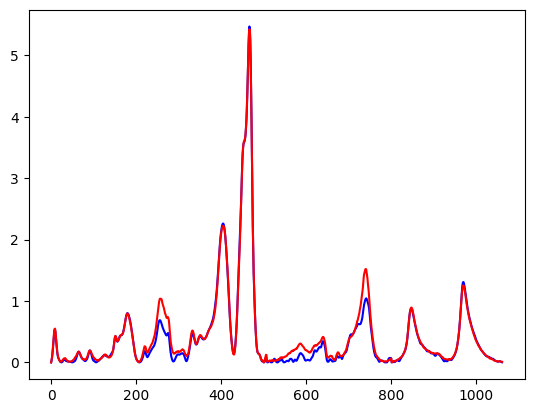

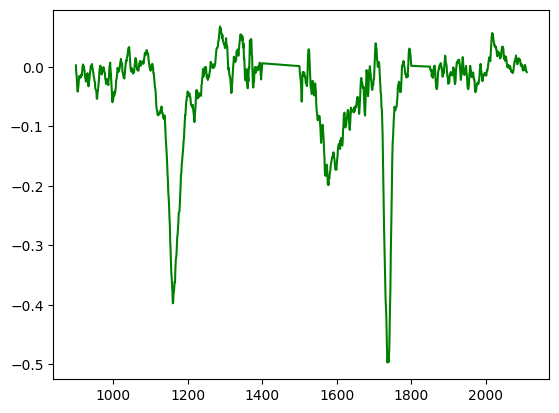

In [ ]:
L1_list=[]
L2_list=[]
L3_list=[]
MSE_list=[]
wavenumber_list=[]
absorbance_list=[]
reconstructed_list=[]
for i in range(spectra_df.shape[0]):    
    f = spectra_df.columns.values[:].astype('float32')
    a = spectra_df.iloc[i,:].values
    try:
        wavenumber, absorbance, encodings, mse, reconstructed = bvae.bvae_pipeline(f, a)
        L1 = encodings[0]
        L2 = encodings[1]
        L3 = encodings[2]
    except Exception as e:
        print(e)
        L1 = 0
        L2 = 0
        L3 = 0
        mse = 100
        reconstructed = np.zeros(len(wavenumber))
        
    L1_list.append(L1)
    L2_list.append(L2)
    L3_list.append(L3)
    MSE_list.append(mse)
    absorbance_list.append(absorbance)
    reconstructed_list.append(reconstructed)
    
    #print(encodings)
    #print(mse)


ValueError: x and y must have same first dimension, but have shapes (1063,) and (6144, 1065)

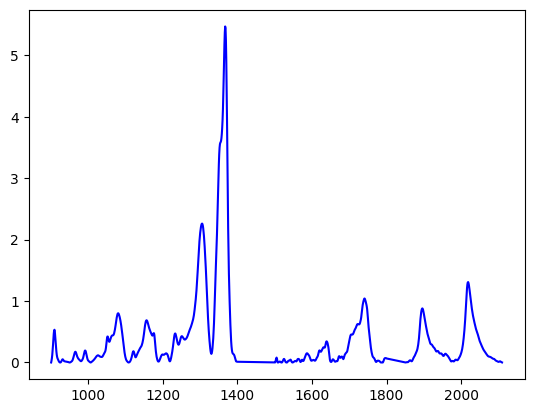

In [47]:
plt.plot(wavenumber, absorbance,c='b')
plt.plot(wavenumber, reconstructed,c='r')
plt.show()

plt.plot(wavenumber, absorbance-reconstructed,c='g')
#plt.plot(wavenumber, absorbance-reconstructed,c='g')
plt.show()

# Save results to dataframe

In [41]:
hyperspectrum =pd.DataFrame(absorbance_list)
hyperspectrum.columns = wavenumber
hyperspectrum['map_x'] = df['map_x'].values
hyperspectrum['map_y'] = df['map_y'].values

In [42]:
reconstructed =pd.DataFrame(reconstructed_list)
reconstructed.columns = wavenumber
reconstructed['map_x'] = df['map_x'].values
reconstructed['map_y'] = df['map_y'].values

In [43]:
bvae_df =pd.DataFrame()
bvae_df['map_x'] = df['map_x'].values
bvae_df['map_y'] = df['map_y'].values
bvae_df['L1'] = L1_list
bvae_df['L2'] = L2_list
bvae_df['L3'] = L3_list
bvae_df['MSE'] = MSE_list

# Save to csv files for viewing in Quasar

In [44]:

path_to_save = 'C:/Users/Zach/Documents/BVAE_processed/'
os.makedirs(path_to_save, exist_ok=True)
bvae_df.to_csv(path_to_save +'bvae_'+filename)

In [45]:
path_to_save = "C:/Users/Zach/Documents/Hyperspectra/"
os.makedirs(path_to_save, exist_ok=True)
file=os.path.join(path_to_save + 'hyperspectrum_'+filename)
hyperspectrum.to_csv(file, index=False)

In [46]:
path_to_save = "C:/Users/Zach/Documents/Reconstructions/"
os.makedirs(path_to_save, exist_ok=True)
reconstructed.to_csv(path_to_save +'reconstructed_'+filename, index=False)